In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir(os.path.dirname("../"))

In [35]:
import deepof.data
import deepof.models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
import tqdm.notebook as tqdm

from ipywidgets import interact

# Retrieve phenotypes

In [4]:
flatten = lambda t: [item for sublist in t for item in sublist]

In [5]:
# Load first batch
dset11 = pd.ExcelFile(
    "../../Desktop/deepof-data/tagged_videos/Individual_datasets/DLC_batch_1/DLC_single_CDR1_1/1.Openfield_data-part1/JB05.1-OF-SI-part1.xlsx"
)
dset12 = pd.ExcelFile(
    "../../Desktop/deepof-data/tagged_videos/Individual_datasets/DLC_batch_1/DLC_single_CDR1_1/2.Openfielddata-part2/AnimalID's-JB05.1-part2.xlsx"
)
dset11 = pd.read_excel(dset11, "Tabelle2")
dset12 = pd.read_excel(dset12, "Tabelle2")

dset11.Test = dset11.Test.apply(lambda x: "Test {}_s1.1".format(x))
dset12.Test = dset12.Test.apply(lambda x: "Test {}_s1.2".format(x))

dset1 = {"CSDS":list(dset11.loc[dset11.Treatment.isin(["CTR+CSDS","NatCre+CSDS"]), "Test"]) + 
                list(dset12.loc[dset12.Treatment.isin(["CTR+CSDS","NatCre+CSDS"]), "Test"]),
         "NS":  list(dset11.loc[dset11.Treatment.isin(["CTR+nonstressed","NatCre+nonstressed"]), "Test"]) + 
                list(dset12.loc[dset12.Treatment.isin(["CTR+nonstressed","NatCre+nonstressed"]), "Test"]),}

dset1inv = {}
for i in flatten(list(dset1.values())):
    if i in dset1["CSDS"]:
        dset1inv[i] = "CSDS"
    else:
        dset1inv[i] = "NS"
        
assert len(dset1inv) == dset11.shape[0] + dset12.shape[0], "You missed some labels!"

In [6]:
# Load second batch
dset21 = pd.read_excel(
    "../../Desktop/deepof-data/tagged_videos/Individual_datasets/DLC_batch_2/Part1/2_Single/stressproject22.04.2020genotypes-openfieldday1.xlsx"
)
dset22 = pd.read_excel(
    "../../Desktop/deepof-data/tagged_videos/Individual_datasets/DLC_batch_2/Part2/2_Single/OpenFieldvideos-part2.xlsx"
)
dset21.Test = dset21.Test.apply(lambda x: "Test {}_s2.1".format(x))
dset22.Test = dset22.Test.apply(lambda x: "Test {}_s2.2".format(x))

dset2 = {"CSDS":list(dset21.loc[dset21.Treatment == "Stress", "Test"]) + 
                list(dset22.loc[dset22.Treatment == "Stressed", "Test"]),
         "NS":  list(dset21.loc[dset21.Treatment == "Nonstressed", "Test"]) +
                list(dset22.loc[dset22.Treatment == "Nonstressed", "Test"])}

dset2inv = {}
for i in flatten(list(dset2.values())):
    if i in dset2["CSDS"]:
        dset2inv[i] = "CSDS"
    else:
        dset2inv[i] = "NS"
        
assert len(dset2inv) == dset21.shape[0] + dset22.shape[0], "You missed some labels!"

In [7]:
# Load third batch

dset31 = pd.read_excel(
    "../../Desktop/deepof-data/tagged_videos/Individual_datasets/DLC_batch_3/1.Day2OF-SIpart1/JB05 2Female-ELS-OF-SIpart1.xlsx"
)
dset32 = pd.read_excel(
    "../../Desktop/deepof-data/tagged_videos/Individual_datasets/DLC_batch_3/2.Day3OF-SIpart2/JB05 2FEMALE-ELS-OF-SIpart2.xlsx"
)
dset31.Test = dset31.Test.apply(lambda x: "Test {}_s3.1".format(x))
dset32.Test = dset32.Test.apply(lambda x: "Test {}_s3.2".format(x))

dset3 = {"CSDS":[],
         "NS":  list(dset31.loc[:, "Test"]) +
                list(dset32.loc[:, "Test"])}

dset3inv = {}
for i in flatten(list(dset3.values())):
    if i in dset3["CSDS"]:
        dset3inv[i] = "CSDS"
    else:
        dset3inv[i] = "NS"
        
assert len(dset3inv) == dset31.shape[0] + dset32.shape[0], "You missed some labels!"

In [8]:
# Load fourth batch
dset41 = os.listdir("../../Desktop/deepof-data/tagged_videos/Individual_datasets/DLC_batch_4/JB05.4-OpenFieldvideos/")

# Remove empty video!
dset41 = [vid for vid in dset41 if "52" not in vid]

dset4 = {"CSDS":[],
         "NS":  [i[:-4]+"_s4" for i in dset41]}

dset4inv = {}
for i in flatten(list(dset4.values())):
    if i in dset4["CSDS"]:
        dset4inv[i] = "CSDS"
    else:
        dset4inv[i] = "NS"
        
assert len(dset4inv) == len(dset41), "You missed some labels!"

In [9]:
# Merge phenotype dicts and serialise!
aggregated_dset = {**dset1inv, **dset2inv, **dset3inv, **dset4inv}

In [10]:
from collections import Counter
print(Counter(aggregated_dset.values()))
print(115+52)

Counter({'NS': 115, 'CSDS': 52})
167


# Define and run project

In [31]:
%%time
deepof_main = deepof.data.project(path=os.path.join("..","..","Desktop","deepof_single_topview"),
                                  smooth_alpha=0.99,                                     
                                  arena_dims=[380],
                                  exclude_bodyparts=["Tail_1", "Tail_2", "Tail_tip", "Tail_base", "Spine_2"]
                                  #exp_conditions=dset2inv
                                 )

CPU times: user 27 s, sys: 4.26 s, total: 31.2 s
Wall time: 6.46 s


In [32]:
%%time
deepof_main = deepof_main.run(verbose=True)
print(deepof_main)

Loading trajectories...
Smoothing trajectories...
Computing distances...
Computing angles...
Done!
deepof analysis of 167 videos
CPU times: user 23.4 s, sys: 1.91 s, total: 25.3 s
Wall time: 26.3 s


In [13]:
all_quality = pd.concat([tab for tab in deepof_main.get_quality().values()]).droplevel("scorer", axis=1)

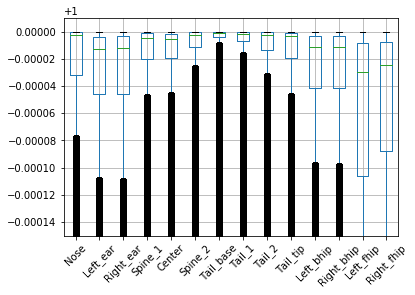

In [14]:
all_quality.boxplot(rot=45)
plt.ylim(0.99985, 1.00001)
plt.show()

In [15]:
@interact(quality_top=(0., 1., 0.01))
def low_quality_tags(quality_top):
    pd.DataFrame(pd.melt(all_quality).groupby("bodyparts").value.apply(
        lambda y: sum(y<quality_top) / len(y) * 100)
                ).sort_values(by="value", ascending=False).plot.bar(rot=45)
    
    plt.xlabel("body part")
    plt.ylabel("Tags with quality under {} (%)".format(quality_top))
    plt.tight_layout()
    plt.legend([])
    plt.show()

interactive(children=(FloatSlider(value=0.5, description='quality_top', max=1.0, step=0.01), Output()), _dom_c…

# Generate coords

In [33]:
%%time
deepof_coords = deepof_main.get_coords(center="Center", polar=False, speed=0, align="Spine_1", align_inplace=True, propagate_labels=False)
#deepof_dists  = deepof_main.get_distances(propagate_labels=False)
#deepof_angles = deepof_main.get_angles(propagate_labels=False)

CPU times: user 50.3 s, sys: 532 ms, total: 50.8 s
Wall time: 50.7 s


# Visualization

In [17]:
dfencs = pd.read_hdf('../../Desktop/dash_data_1_20201120-141341.h5')
dfencs.cluster = dfencs.cluster.astype(str) + "a"
clust_occur = pd.read_hdf('../../Desktop/dash_data_2_20201120-141341.h5')

FileNotFoundError: File ../../Desktop/dash_data_1_20201120-141341.h5 does not exist

In [ ]:
pal = sns.color_palette("tab10", n_colors=10)
plt.rcParams['figure.dpi'] = 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

sns.barplot(data=clust_occur.loc[clust_occur.reset_index().epoch==1,:], x="cluster", y="count", ax=ax1, 
            palette=pal)
sns.barplot(data=clust_occur.loc[clust_occur.reset_index().epoch==2,:], x="cluster", y="count", ax=ax2, 
            palette=pal)

sns.scatterplot(data=dfencs.loc[dfencs.epoch==1,:], x="x", y="y", hue="cluster", legend=False, cmap="jet", ax=ax3, alpha=0.4,
                palette=pal, size=1, edgecolor=None)
sns.scatterplot(data=dfencs.loc[dfencs.epoch==2,:], x="x", y="y", hue="cluster", legend=False, cmap="jet", ax=ax4, alpha=0.4,
                palette=pal, size=1, edgecolor=None)

ax1.set_xlabel("Cluster number")
ax2.set_xlabel("Cluster number")
ax3.set_xlabel("UMAP 1")
ax4.set_xlabel("UMAP 1")

ax1.set_ylabel("Count")
ax2.set_ylabel("Count")
ax3.set_ylabel("UMAP 2")
ax4.set_ylabel("UMAP 2")

ax1.set_ylim(0,2000)
ax2.set_ylim(0,2000)

ax3.set_xlim(0.58,0.88)
ax3.set_ylim(0.35,0.65)

ax4.set_xlim(0.1,1.1)
ax4.set_ylim(0.1,1.1)

plt.tight_layout()
plt.show()
# plt.savefig("../../Desktop/udeepof-embedding.tiff", dpi=600)

In [ ]:
heat = deepof_coords.plot_heatmaps(['Nose'], i=1, dpi=40)

In [69]:
%%time

tf.keras.backend.clear_session()

print("Preprocessing training set...")
deepof_train = deepof_coords.preprocess(
    window_size=11,
    window_step=11,
    conv_filter=None,
    scale="minmax",
    shuffle=True,
    test_videos=0,
)[0]

print("Loading pre-trained model...")
encoder, _, grouper, gmvaep, = deepof.models.SEQ_2_SEQ_GMVAE(
    loss="ELBO",
    number_of_components=10,
    compile_model=True,
    kl_warmup_epochs=20,
    encoding=6,
    mmd_warmup_epochs=0,
    predictor=0,
    phenotype_prediction=0,
).build(deepof_train.shape)[:4]

#gmvaep.load_weights("../../Desktop/GMVAE_loss=ELBO_encoding=6_run_0_final_weights.h5")

Preprocessing training set...
Loading pre-trained model...
(227686, 11, 16)
CPU times: user 3.02 s, sys: 419 ms, total: 3.44 s
Wall time: 3.34 s


2020-12-07 01:02:54.353 dot[32940:1323963] XType: failed to connect - Error Domain=NSCocoaErrorDomain Code=4099 "The connection to service on pid 0 named com.apple.fonts was invalidated." UserInfo={NSDebugDescription=The connection to service on pid 0 named com.apple.fonts was invalidated.}
2020-12-07 01:02:54.353 dot[32940:1323963] Font server protocol version mismatch (expected:5 got:0), falling back to local fonts
2020-12-07 01:02:54.353 dot[32940:1323963] XType: unable to make a connection to the font daemon!
2020-12-07 01:02:54.353 dot[32940:1323963] registering /System/Library/Fonts/*, /System/Library/Fonts/Base/*, and /System/Library/Fonts/Supplemental/* locally



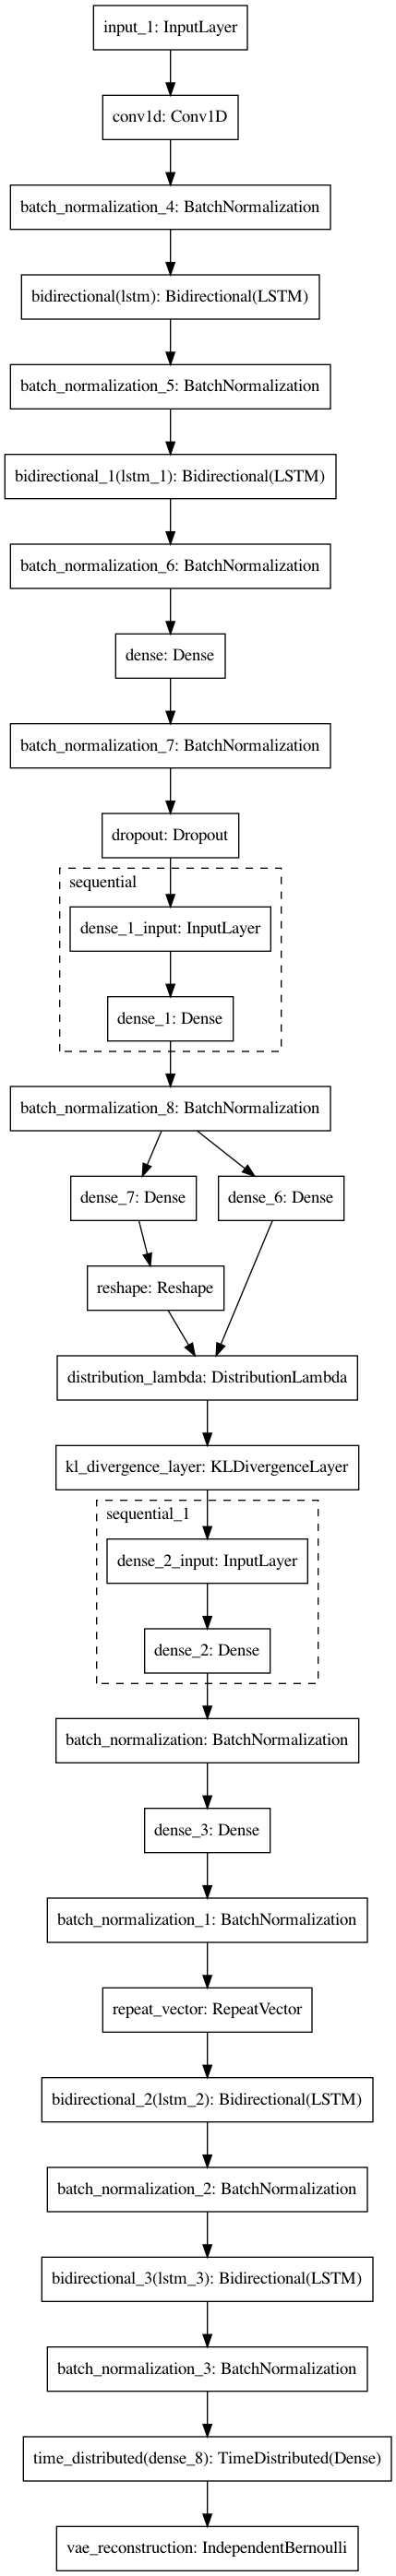

In [59]:
tf.keras.utils.plot_model(gmvaep, expand_nested=True)

In [70]:
samples = 10000

all_clusters = grouper.predict(deepof_train[:samples])
all_encodings = encoder.predict(deepof_train[:samples])

In [71]:
video_input = deepof.data.table_dict({"Test 10_s11":deepof_coords["Test 10_s11"]}, typ="coords").preprocess(
                                                                                                window_size=11,
                                                                                                window_step=1,
                                                                                                conv_filter=None,
                                                                                                scale="minmax",
                                                                                                shuffle=False,
                                                                                                test_videos=0,
                                                                                            )[0]
scaler = MinMaxScaler()
scaler.fit(deepof_coords["Test 10_s11"])

# Get reconstruction
video_pred = gmvaep.predict(video_input)[:, 6, :]

# Get encodings
video_clusters = grouper.predict(video_input)
video_encodings = encoder.predict(video_input)

scaled_video_pred = scaler.inverse_transform(video_pred)
scaled_video_input = scaler.inverse_transform(video_input[:, 6, :])

scaled_video_input = pd.DataFrame(scaled_video_input, columns=deepof_coords["Test 10_s11"].columns)
scaled_video_pred = pd.DataFrame(scaled_video_pred, columns=deepof_coords["Test 10_s11"].columns)

Consider rewriting this model with the Functional API.


In [72]:
tf.reduce_mean( tf.keras.losses.mean_absolute_error(video_pred, video_input[:, 6, :]))

<tf.Tensor: shape=(), dtype=float64, numpy=0.20314890972388944>

In [51]:
import umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import plotly.express as px

AttributeError: module 'umap' has no attribute 'distances'

In [52]:
def plot_encodings(data, samples, n, clusters, threshold, highlight=None):
    
    reducer  = LinearDiscriminantAnalysis(n_components=n)
    clusters = clusters[:samples, :]
    
    # filter   = np.max(np.mean(clusters, axis=0), axis=1) > threshold
    
    clusters = np.argmax(clusters, axis=1)#[filter]
    rep = reducer.fit_transform(data[:samples], clusters)

    if n == 2:
        df = pd.DataFrame({"encoding-1":rep[:,0],"encoding-2":rep[:,1],"clusters":["A"+str(i) for i in clusters]})

        enc = px.scatter(data_frame=df, x="encoding-1", y="encoding-2",
                           color="clusters", width=600, height=600,
                           color_discrete_sequence=px.colors.qualitative.T10)
                
        #if highlight:
        #    ig.add_trace(go.Scatter(x=, y=)

    elif n == 3:
        df3d = pd.DataFrame({"encoding-1":rep[:,0],"encoding-2":rep[:,1],"encoding-3":rep[:,2],
                         "clusters":["A"+str(i) for i in clusters]})

        enc = px.scatter_3d(data_frame=df3d, x="encoding-1", y="encoding-2", z="encoding-3",
                           color="clusters", width=600, height=600,
                           color_discrete_sequence=px.colors.qualitative.T10)

    return enc

In [53]:
plot_encodings(all_encodings, 10000, 2, all_clusters, 1, 10)

NameError: name 'LinearDiscriminantAnalysis' is not defined

In [73]:
# Draft: function to produce a video with the animal in motion using cv2
import cv2

w = 400
h = 400
factor = 2.5

# Instantiate video
writer = cv2.VideoWriter()
writer.open(
    "test_video.avi",
    cv2.VideoWriter_fourcc(*"MJPG"),
    24,
    (int(w * factor), int(h * factor)),
    True,
)

for frame in tqdm.tqdm(range(500)):

    image = np.zeros((h, w, 3), np.uint8) + 30
    for bpart in scaled_video_input.columns.levels[0]:

        try:
            pos = (
                (-int(scaled_video_input[bpart].loc[frame, "x"]) + w // 2),
                (-int(scaled_video_input[bpart].loc[frame, "y"]) + h // 2),
            )

            pos_pred = (
                (-int(scaled_video_pred[bpart].loc[frame, "x"]) + w // 2),
                (-int(scaled_video_pred[bpart].loc[frame, "y"]) + h // 2),
            )

            cv2.circle(image, pos, 2, (0, 0, 255), -1)
            cv2.circle(image, pos_pred, 2, (0, 255, 0), -1)
            
        except KeyError:
            continue

    # draw skeleton
    def draw_line(start, end, df, col):
        for bpart in end:
            cv2.line(
                image,
                tuple(-df[start].loc[frame, :].astype(int) + w // 2),
                tuple(-df[bpart].loc[frame, :].astype(int) + h // 2),
                col,
                1,
            )

    for df, col in zip([scaled_video_input, scaled_video_pred], [(0,0,255),(0,255,0)]):
        draw_line("Nose", ["Left_ear", "Right_ear"], df, col)
        draw_line("Spine_1", ["Left_ear", "Right_ear", "Left_fhip", "Right_fhip"], df, col)
        #draw_line("Spine_2", ["Spine_1", "Tail_base", "Left_bhip", "Right_bhip"], df, col)
        #draw_line("Tail_1", ["Tail_base", "Tail_2"], df, col)
        #draw_line("Tail_tip", ["Tail_2"], df, col)

    image = cv2.resize(image, (0, 0), fx=factor, fy=factor)
    writer.write(image)

writer.release()
cv2.destroyAllWindows()

# Preprocessing

In [ ]:
%%time
X_train, y_train, X_test, y_test = deepof_coords.preprocess(window_size=11, window_step=11, conv_filter=None, sigma=55,
                                                            shift=0, scale='standard', align='all', shuffle=True, test_videos=5)
print("Train dataset shape: ", X_train.shape)
print("Train dataset shape: ", y_train.shape)
print("Test dataset shape: ", X_test.shape)
print("Test dataset shape: ", y_test.shape)

# Build models and get learning rate (1-cycle policy)

### Seq 2 seq Variational Auto Encoder

In [ ]:
from datetime import datetime
import tensorflow.keras as k
import tensorflow as tf

In [ ]:
NAME = 'Baseline_AE'
log_dir = os.path.abspath(
    "logs/fit/{}_{}".format(NAME, datetime.now().strftime("%Y%m%d-%H%M%S"))
)
tensorboard_callback = k.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
from deepof.models import SEQ_2_SEQ_AE, SEQ_2_SEQ_GMVAE

In [ ]:
encoder, decoder, ae = SEQ_2_SEQ_AE().build(X_train.shape)

In [ ]:
%%time

tf.keras.backend.clear_session()

encoder, generator, grouper, gmvaep, kl_warmup_callback, mmd_warmup_callback = SEQ_2_SEQ_GMVAE(loss='ELBO',
                                                                               compile_model=True,
                                                                               number_of_components=10,
                                                                               kl_warmup_epochs=20,
                                                                               mmd_warmup_epochs=0,
                                                                               predictor=0,
                                                                               phenotype_prediction=0,
                                                                               architecture_hparams={"encoding":2}
                                                                                ).build(X_train.shape)

In [ ]:
batch_size = 512
rates, losses = deepof.model_utils.find_learning_rate(gmvaep, deepof_train[:512*10], deepof_test[:512*10], epochs=1, batch_size=batch_size)
deepof.model_utils.plot_lr_vs_loss(rates, losses)
plt.title("Learning rate tuning")
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])
plt.show()

In [ ]:
history = gmvaep.fit(
                    x=X_train,
                    y=X_train,
                    epochs=1,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test, [X_test, y_test]),
                    callbacks=[kl_warmup_callback],
                )

# Encoding plots

In [ ]:
import umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import plotly.express as px

In [ ]:
data = pttest
samples = 15000
montecarlo = 10

In [ ]:
weights = "GMVAE_components=30_loss=ELBO_kl_warmup=30_mmd_warmup=30_20200804-225526_final_weights.h5"

gmvaep.load_weights(weights)

if montecarlo:
    clusts = np.stack([grouper(data[:samples]) for sample in (tqdm(range(montecarlo)))])
    clusters = clusts.mean(axis=0)
    clusters = np.argmax(clusters, axis=1)
    
else:
    clusters = grouper(data[:samples], training=False)

    
    clusters = np.argmax(clusters, axis=1)

In [ ]:
def plot_encodings(data, samples, n, clusters, threshold):
    
    reducer  = PCA(n_components=n)
    clusters = clusters[:, :samples]
    filter   = np.max(np.mean(clusters, axis=0), axis=1) > threshold
    encoder.predict(data[:samples][filter])
    print("{}/{} samples used ({}%); confidence threshold={}".format(sum(filter),
                                                                     samples,
                                                                     sum(filter)/samples*100,
                                                                     threshold))
    
    clusters = np.argmax(np.mean(clusters, axis=0), axis=1)[filter]
    rep = reducer.fit_transform(encoder.predict(data[:samples][filter]))

    if n == 2:
        df = pd.DataFrame({"encoding-1":rep[:,0],"encoding-2":rep[:,1],"clusters":["A"+str(i) for i in clusters]})

        enc = px.scatter(data_frame=df, x="encoding-1", y="encoding-2",
                           color="clusters", width=600, height=600,
                           color_discrete_sequence=px.colors.qualitative.T10)


    elif n == 3:
        df3d = pd.DataFrame({"encoding-1":rep[:,0],"encoding-2":rep[:,1],"encoding-3":rep[:,2],
                         "clusters":["A"+str(i) for i in clusters]})

        enc = px.scatter_3d(data_frame=df3d, x="encoding-1", y="encoding-2", z="encoding-3",
                           color="clusters", width=600, height=600,
                           color_discrete_sequence=px.colors.qualitative.T10)

    return enc

plot_encodings(data, 5000, 2, clusts, 0.5)

# Confidence per cluster

In [ ]:
from collections import Counter
Counter(clusters)

In [ ]:
# Confidence distribution per cluster
for cl in range(5):
    cl_select = np.argmax(np.mean(clusts, axis=0), axis=1) == cl
    dt = np.mean(clusts[:,cl_select,cl], axis=0)
    sns.kdeplot(dt, shade=True, label=cl)
    
plt.xlabel('MC Dropout confidence')
plt.ylabel('Density')

plt.show()

In [ ]:
def animated_cluster_heatmap(data, clust, clusters, threshold=0.75, samples=False):
    
    if not samples:
        samples = data.shape[0]
    tpoints = data.shape[1]
    bdparts = data.shape[2] // 2
    
    cls = clusters[:,:samples,:]
    filt = np.max(np.mean(cls, axis=0), axis=1) > threshold
    
    cls = np.argmax(np.mean(cls, axis=0), axis=1)[filt]
    clust_series = data[:samples][filt][cls==clust]
        
    rshape = clust_series.reshape(clust_series.shape[0]*clust_series.shape[1],
                                  clust_series.shape[2])
    
    cluster_df = pd.DataFrame()
    cluster_df['x'] = rshape[:,[0,2,4,6,8,10]].flatten(order='F')
    cluster_df['y'] = rshape[:,[1,3,5,7,9,11]].flatten(order='F')
    cluster_df['bpart'] = np.tile(np.repeat(np.arange(bdparts),
                                            clust_series.shape[0]), tpoints)
    cluster_df['frame'] = np.tile(np.repeat(np.arange(tpoints),
                                            clust_series.shape[0]), bdparts)
        
    fig = px.density_contour(data_frame=cluster_df, x='x', y='y', animation_frame='frame',
                     width=600, height=600, 
                     color='bpart',color_discrete_sequence=px.colors.qualitative.T10)

    fig.update_traces(contours_coloring="fill", 
                      contours_showlabels = True)
    
    fig.update_xaxes(range=[-3, 3])
    fig.update_yaxes(range=[-3, 3])

    return fig

In [ ]:
# animated_cluster_heatmap(pttest, 4, clusts, samples=10)

# Stability across runs

In [ ]:
weights = [i for i in os.listdir() if "GMVAE" in i and ".h5" in i]
mult_clusters = np.zeros([len(weights), samples])
mean_conf = []

for k,i in tqdm(enumerate(sorted(weights))):
    print(i)
    gmvaep.load_weights(i)

    if montecarlo:
        clusters = np.stack([grouper(data[:samples]) for sample in (tqdm(range(montecarlo)))])
        clusters = clusters.mean(axis=0)
        mean_conf.append(clusters.max(axis=1))
        clusters = np.argmax(clusters, axis=1)
        
    
    else:
        clusters = grouper(data[:samples], training=False)
        mean_conf.append(clusters.max(axis=1))
        clusters = np.argmax(clusters, axis=1)
        
    mult_clusters[k] = clusters

In [ ]:
clusts.shape

In [ ]:
import pandas as pd
from itertools import combinations
from sklearn.metrics import adjusted_rand_score

In [ ]:
mult_clusters

In [ ]:
thr = 0.95
ari_dist = []

for i,k in enumerate(combinations(range(len(weights)),2)):
    filt = ((mean_conf[k[0]] > thr) & (mean_conf[k[1]]>thr))
    
    ari = adjusted_rand_score(mult_clusters[k[0]][filt],
                              mult_clusters[k[1]][filt])
    
    ari_dist.append(ari)

In [ ]:
ari_dist

In [ ]:
random_ari = []
for i in tqdm(range(6)):
    random_ari.append(adjusted_rand_score(np.random.uniform(0,6,50).astype(int),
                                          np.random.uniform(0,6,50).astype(int)))

In [ ]:
sns.kdeplot(ari_dist, label="ARI gmvaep", shade=True)
sns.kdeplot(random_ari, label="ARI random", shade=True)

plt.xlabel("Normalised Adjusted Rand Index")
plt.ylabel("Density")

plt.legend()
plt.show()

# Cluster differences across conditions

In [ ]:
%%time

DLCS1_coords = DLC_social_1_coords.get_coords(center="B_Center",polar=False, length='00:10:00', align='B_Nose')

Treatment_coords = {}

for cond in Treatment_dict.keys():
    Treatment_coords[cond] = DLCS1_coords.filter(Treatment_dict[cond]).preprocess(window_size=13, 
                                                 window_step=10, filter=None, scale='standard', align='center')

In [ ]:
%%time

montecarlo = 10

Predictions_per_cond = {}
Confidences_per_cond = {}

for cond in Treatment_dict.keys():
    
    Predictions_per_cond[cond] = np.stack([grouper(Treatment_coords[cond]
                         ) for sample in (tqdm(range(montecarlo)))])

    Confidences_per_cond[cond] = np.mean(Predictions_per_cond[cond], axis=0)
    Predictions_per_cond[cond] = np.argmax(Confidences_per_cond[cond], axis=1) 
    


In [ ]:
Predictions_per_condition = {k:{cl:[] for cl in range(1,31)} for k in Treatment_dict.keys()}

for k in Predictions_per_cond.values():
    print(Counter(k))

In [ ]:
for cond in Treatment_dict.keys():
    start = 0
    for i,j in enumerate(DLCS1_coords.filter(Treatment_dict[cond]).values()):
        
        update  = start + j.shape[0]//10
        counter = Counter(Predictions_per_cond[cond][start:update])
        start  += j.shape[0]//10
        
        for num in counter.keys():
            Predictions_per_condition[cond][num+1].append(counter[num+1])

In [ ]:
counts = []
clusters = []
conditions = []
for cond,v in Predictions_per_condition.items():
    for cluster,i in v.items():
        counts+=i
        clusters+=list(np.repeat(cluster, len(i)))
        conditions+=list(np.repeat(cond, len(i)))
        
Prediction_per_cond_df = pd.DataFrame({'condition':conditions,
                                       'cluster':clusters,
                                       'count':counts})

In [ ]:
px.box(data_frame=Prediction_per_cond_df, x='cluster', y='count', color='condition')

# Others

In [ ]:
for i in range(5):
    print(Counter(labels[str(i)]))

In [ ]:
adjusted_rand_score(labels[0], labels[3])

In [ ]:
sns.distplot(ari_dist)
plt.xlabel("Adjusted Rand Index")
plt.ylabel("Count")
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

In [ ]:
from scipy.stats import entropy

In [ ]:
entropy(np.array([0.5,0,0.5,0]))

In [ ]:
tfd.Categorical(np.array([0.5,0.5,0.5,0.5])).entropy()

In [ ]:
pk = np.array([0.5,0,0.5,0])

In [ ]:
np.log(pk)

In [ ]:
np.clip(np.log(pk), 0, 1)

In [ ]:
-np.sum(pk*np.array([-0.69314718,        0, -0.69314718,        0]))

In [ ]:
import tensorflow.keras.backend as K
entropy = K.sum(tf.multiply(pk, tf.where(~tf.math.is_inf(K.log(pk)), K.log(pk), 0)), axis=0)
entropy

In [ ]:
sns.distplot(np.max(clusts, axis=1))
sns.distplot(clusts.reshape(clusts.shape[0] * clusts.shape[1]))
plt.axvline(1/10)
plt.show()

In [ ]:
gauss_means = gmvaep.get_layer(name="dense_4").get_weights()[0][:32]
gauss_variances = tf.keras.activations.softplus(gmvaep.get_layer(name="dense_4").get_weights()[0][32:]).numpy()

In [ ]:
gauss_means.shape == gauss_variances.shape

In [ ]:
k=10
n=100
samples = []
for i in range(k):
    samples.append(np.random.normal(gauss_means[:,i], gauss_variances[:,i], size=(100,32)))

In [ ]:
from scipy.stats import ttest_ind
test_matrix = np.zeros([k,k])
for i in range(k):
    for j in range(k):
        test_matrix[i][j] = np.mean(ttest_ind(samples[i], samples[j], equal_var=False)[1])

In [ ]:
threshold = 0.55
np.sum(test_matrix > threshold)

In [ ]:
# Transition matrix


In [ ]:
Treatment_dict

In [ ]:
# Anomaly detection - the model was trained in the WT - NS mice alone
gmvaep.load_weights("GMVAE_components=10_loss=ELBO_kl_warmup=20_mmd_warmup=5_20200721-043310_final_weights.h5")

In [ ]:
WT_NS = table_dict({k:v for k,v in mtest2.items() if k in Treatment_dict['WT+NS']}, typ="coords")
WT_WS = table_dict({k:v for k,v in mtest2.items() if k in Treatment_dict['WT+CSDS']}, typ="coords")
MU_NS = table_dict({k:v for k,v in mtest2.items() if k in Treatment_dict['NatCre+NS']}, typ="coords")
MU_WS = table_dict({k:v for k,v in mtest2.items() if k in Treatment_dict['NatCre+CSDS']}, typ="coords")

preps = [WT_NS.preprocess(window_size=11, window_step=10, filter="gaussian", sigma=55,shift=0, scale="standard", align=True),
         WT_WS.preprocess(window_size=11, window_step=10, filter="gaussian", sigma=55,shift=0, scale="standard", align=True),
         MU_NS.preprocess(window_size=11, window_step=10, filter="gaussian", sigma=55,shift=0, scale="standard", align=True),
         MU_WS.preprocess(window_size=11, window_step=10, filter="gaussian", sigma=55,shift=0, scale="standard", align=True)]

In [ ]:
preds = [gmvaep.predict(i) for i in preps]

In [ ]:
from sklearn.metrics import mean_absolute_error
reconst_error = {k:mean_absolute_error(preps[i].reshape(preps[i].shape[0]*preps[i].shape[1],12).T, 
                                       preds[i].reshape(preds[i].shape[0]*preds[i].shape[1],12).T,
                                       multioutput='raw_values') for i,k in enumerate(Treatment_dict.keys())}

reconst_error

In [ ]:
reconst_df = pd.concat([pd.DataFrame(np.concatenate([np.repeat(k, len(v)).reshape(len(v),1), v.reshape(len(v),1)],axis=1)) for k,v in reconst_error.items()])
reconst_df = reconst_df.astype({0:str,1:float})

In [ ]:
sns.boxplot(data=reconst_df, x=0, y=1, orient='vertical')
plt.ylabel('Mean Absolute Error')
plt.ylim(0,0.35)
plt.show()

In [ ]:
# Check frame rates